In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
loan_data = pd.read_csv('cleaned_loan_approval_dataset.csv')
loan_data.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,movable_assets,immovable_assets,loan_to_income_ratio,assets_to_loan_ratio,cibil_category
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000,3.114583,1.695652,Excellent
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000,2.975610,1.393443,Poor
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000,3.263736,1.942761,Poor
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000,3.743902,1.716612,Poor
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000,2.469388,2.272727,Poor


In [3]:
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_dependents      4269 non-null   int64  
 1   education             4269 non-null   object 
 2   self_employed         4269 non-null   object 
 3   income_annum          4269 non-null   int64  
 4   loan_amount           4269 non-null   int64  
 5   loan_term             4269 non-null   int64  
 6   cibil_score           4269 non-null   int64  
 7   loan_status           4269 non-null   object 
 8   movable_assets        4269 non-null   int64  
 9   immovable_assets      4269 non-null   int64  
 10  loan_to_income_ratio  4269 non-null   float64
 11  assets_to_loan_ratio  4269 non-null   float64
 12  cibil_category        4269 non-null   object 
dtypes: float64(2), int64(7), object(4)
memory usage: 433.7+ KB


In [4]:
loan_data.describe()


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,movable_assets,immovable_assets,loan_to_income_ratio,assets_to_loan_ratio
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07,2.984807,2.231797
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06,0.595496,0.643145
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05,1.500000,0.750000
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06,2.464286,1.767347
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07,3.000000,2.142857
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07,3.500000,2.616216
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07,4.000000,5.666667


In [5]:

categorical_columns = loan_data.select_dtypes(include=['object']).columns
categorical_data_summary = loan_data[categorical_columns].describe()


categorical_data_summary


,education,self_employed,loan_status,cibil_category
count,4269,4269,4269,4269
unique,2,2,2,4
top,Graduate,Yes,Approved,Poor
freq,2144,2150,2656,1789


# Univariate Analysis

Analyse the distribution and statistics of each variable

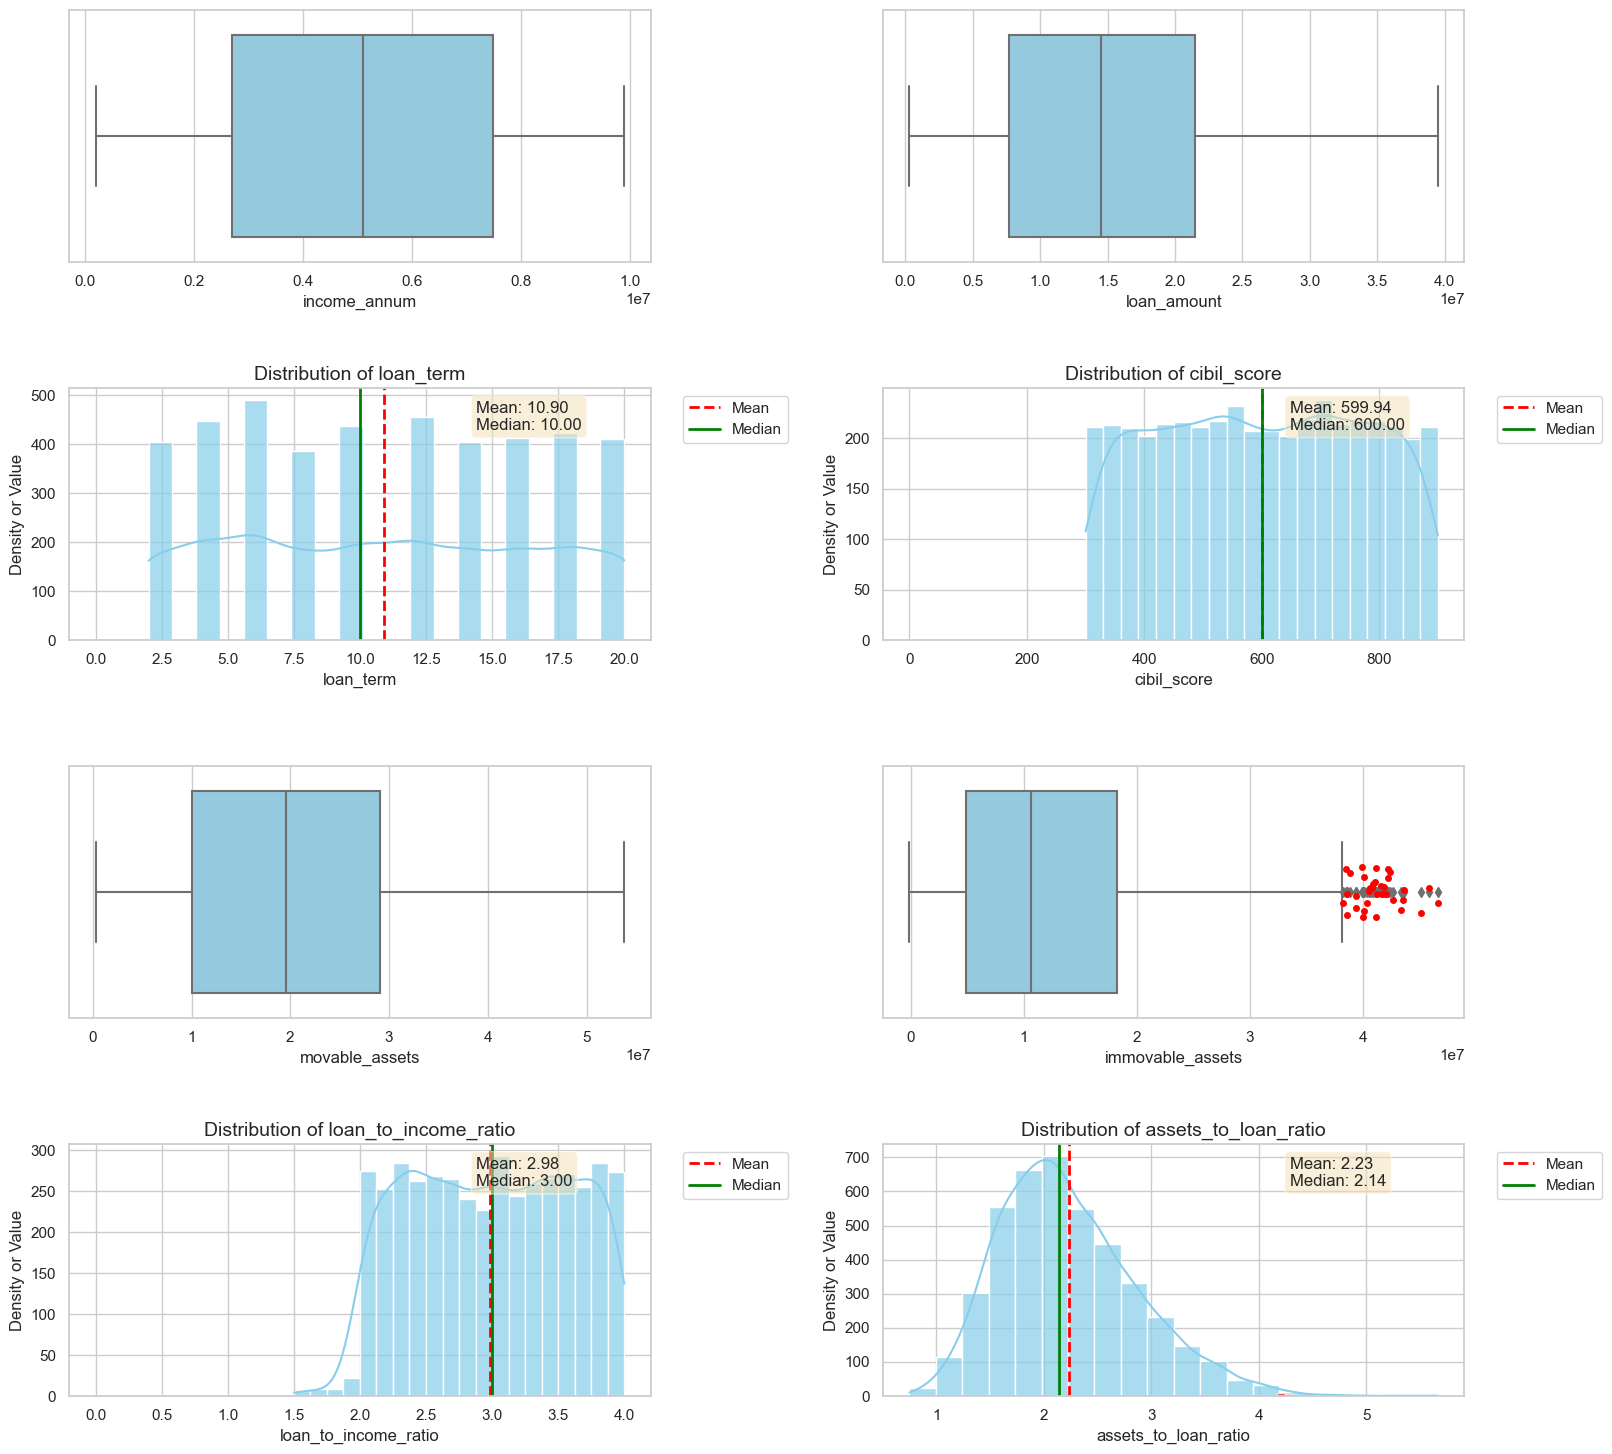

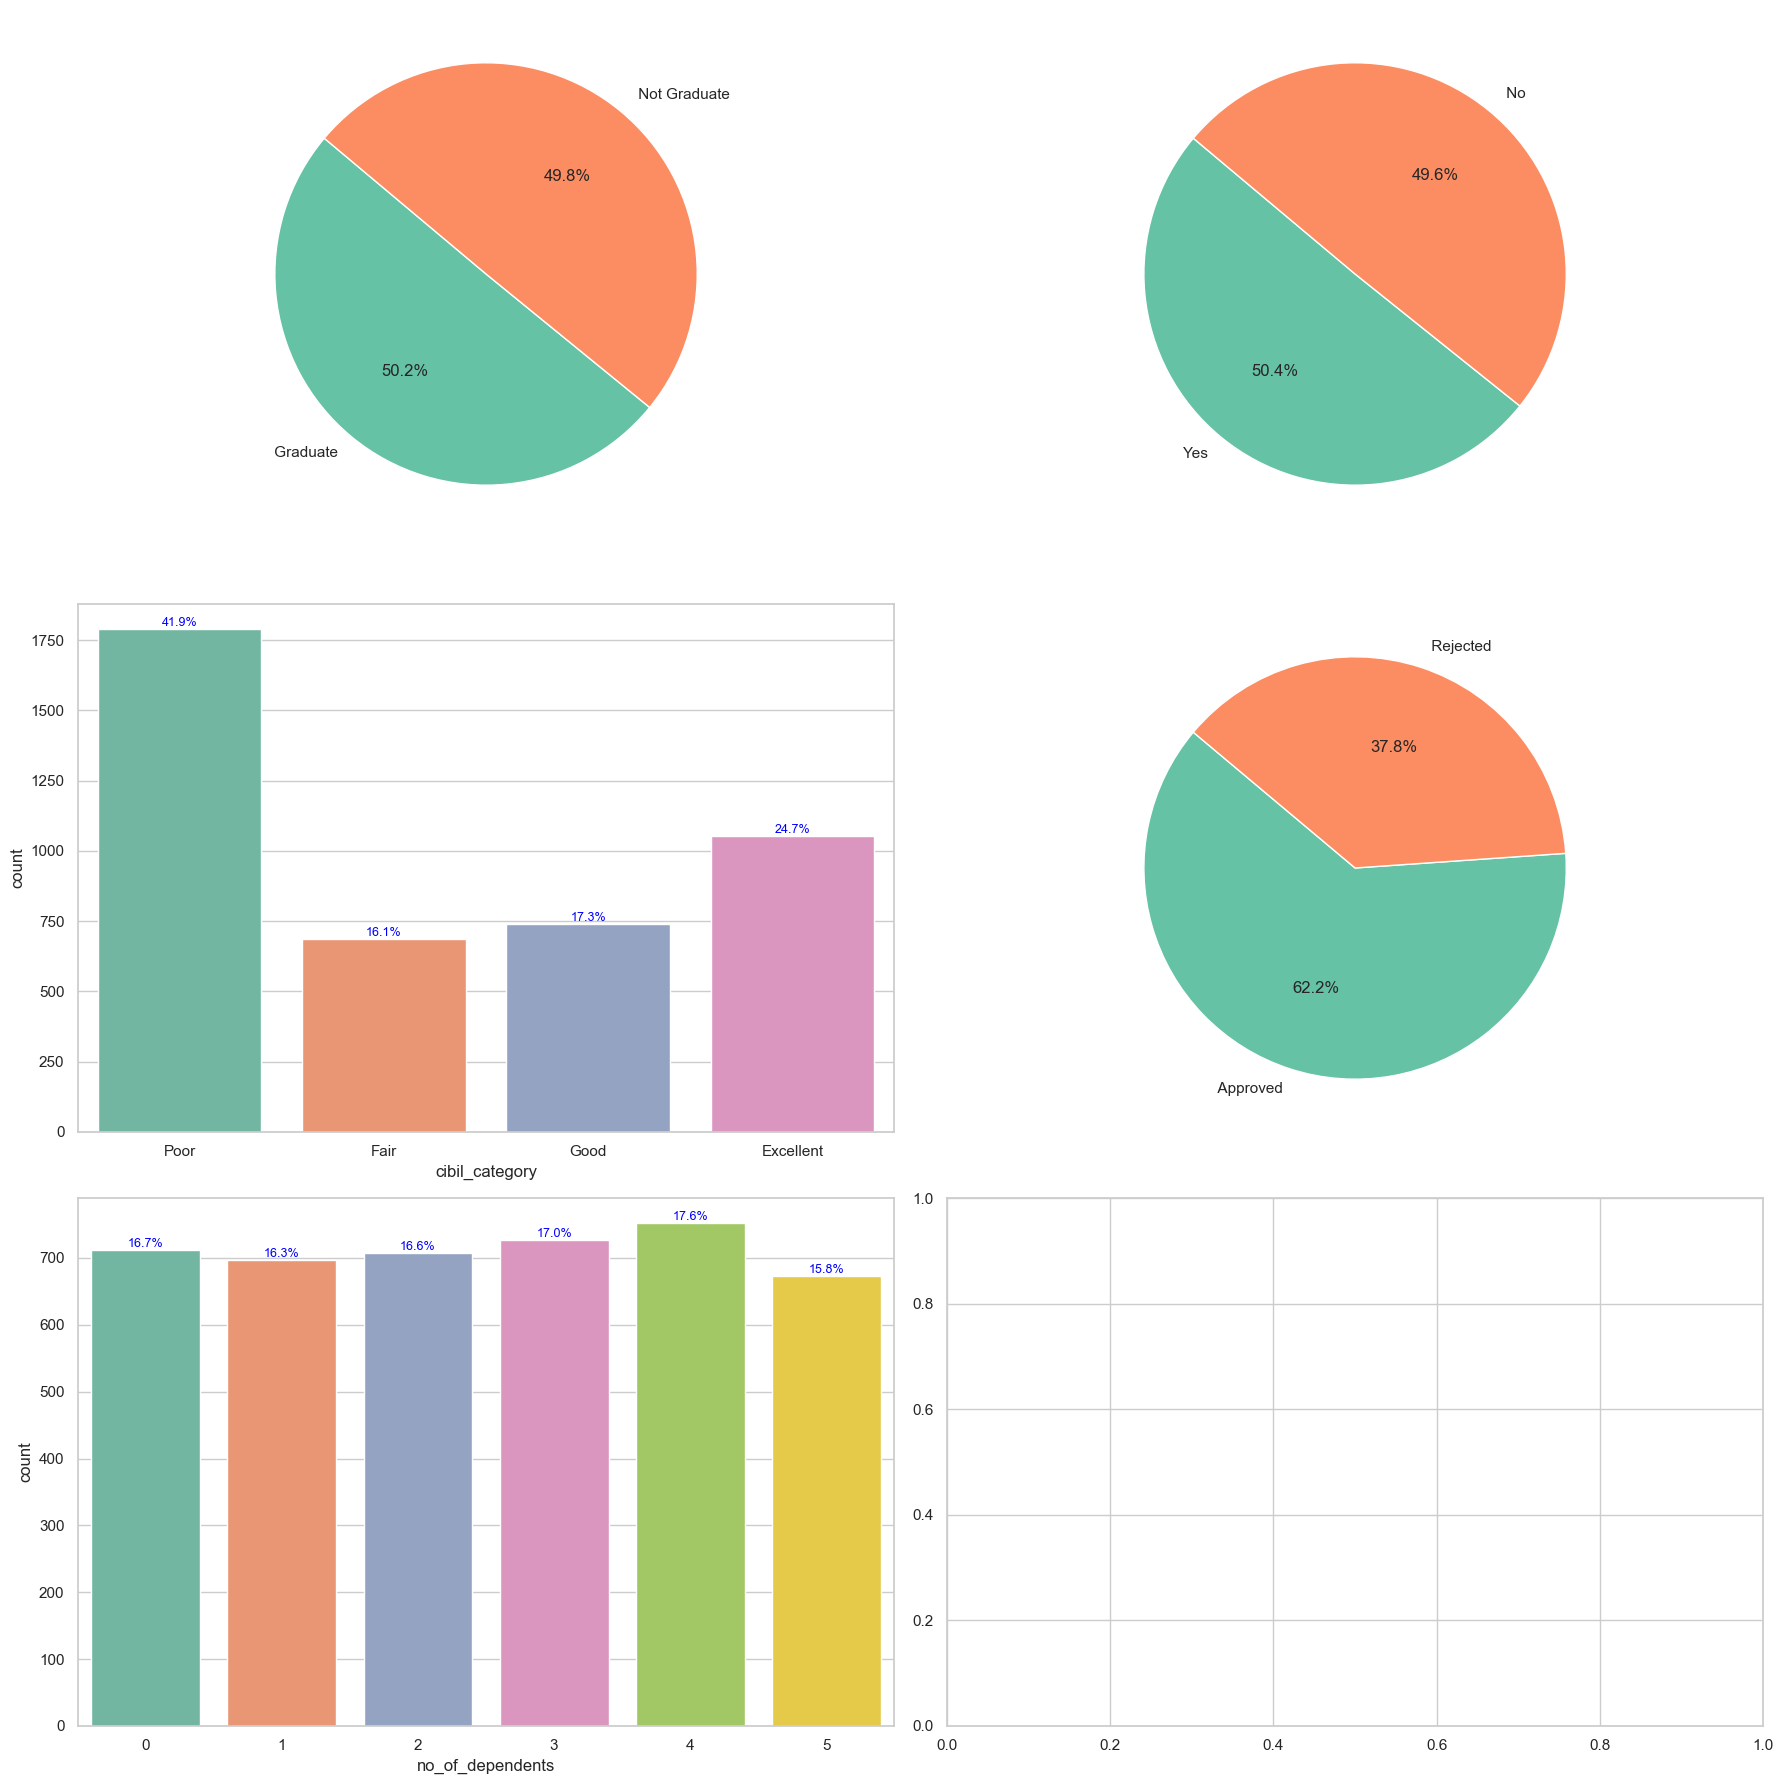

<Figure size 640x480 with 0 Axes>

Number of Z-score outliers in income_annum: 0
Number of IQR outliers in income_annum: 0
--------------------------------------------------------------------------------
Number of Z-score outliers in loan_amount: 0
Number of IQR outliers in loan_amount: 0
--------------------------------------------------------------------------------
Number of Z-score outliers in loan_term: 0
Number of IQR outliers in loan_term: 0
--------------------------------------------------------------------------------
Number of Z-score outliers in cibil_score: 0
Number of IQR outliers in cibil_score: 0
--------------------------------------------------------------------------------
Number of Z-score outliers in movable_assets: 0
Number of IQR outliers in movable_assets: 0
--------------------------------------------------------------------------------
Number of Z-score outliers in immovable_assets: 23
Number of IQR outliers in immovable_assets: 34
---------------------------------------------------------------

In [6]:
sns.set(style="whitegrid", palette="pastel")


num_vars = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'movable_assets', 'immovable_assets', 'loan_to_income_ratio', 'assets_to_loan_ratio']
cat_vars = ['education', 'self_employed', 'cibil_category', 'loan_status', 'no_of_dependents']


def calc_outliers(data, col):
    z_scores = np.abs(stats.zscore(data[col]))
    z_outliers = z_scores > 3
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_lower_bound = Q1 - 1.5 * IQR
    iqr_upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = (data[col] < iqr_lower_bound) | (data[col] > iqr_upper_bound)
    return z_outliers, iqr_outliers


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 18))  # Adjusted layout for better spacing
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, var in enumerate(num_vars):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    z_outliers, iqr_outliers = calc_outliers(loan_data, var)
    
    if var in ['income_annum', 'loan_amount', 'movable_assets', 'immovable_assets']:
        sns.boxplot(x=loan_data[var], ax=ax, color='skyblue')
        sns.stripplot(x=loan_data[var][iqr_outliers], color='red', jitter=True, ax=ax)  # Mark IQR outliers
    else:

        sns.histplot(loan_data[var], kde=True, ax=ax, bins=20, color='skyblue', alpha=0.7)

        ax.hist(loan_data[var][z_outliers], bins=20, color='red', alpha=0.7)

        mean_val = loan_data[var].mean()
        median_val = loan_data[var].median()
        stats_text = f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}"
        ax.text(0.7, 0.95, stats_text, transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label='Mean')
        ax.axvline(median_val, color='green', linestyle='-', linewidth=2, label='Median')
        ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
        ax.set_title(f'Distribution of {var}', fontsize=14)
        ax.set_ylabel('Density or Value')
    

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, var in enumerate(cat_vars):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    if var in ['education', 'self_employed', 'loan_status']:  # Choosing pie charts for these variables
        data = loan_data[var].value_counts()
        ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
        ax.set_ylabel('')
    elif var == 'cibil_category':
        category_order = ['Poor', 'Fair', 'Good', 'Excellent']
        sns.countplot(x=var, data=loan_data, ax=ax, palette='Set2', order=category_order)
        total_count = len(loan_data[var])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=9, color='blue')
    else:
        sns.countplot(x=var, data=loan_data, ax=ax, palette='Set2')
        total_count = len(loan_data[var])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=9, color='blue')
   

plt.tight_layout()
plt.show()
ax.set_title(f'Frequency of {var}', fontsize=14)

plt.tight_layout()
plt.show()

def count_outliers(data, col):

    z_scores = np.abs(stats.zscore(data[col].dropna()))
    z_outliers = data[np.abs(z_scores) > 3]


    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_lower_bound = Q1 - 1.5 * IQR
    iqr_upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = data[(data[col] < iqr_lower_bound) | (data[col] > iqr_upper_bound)]


    print(f"Number of Z-score outliers in {col}: {z_outliers.shape[0]}")
    print(f"Number of IQR outliers in {col}: {iqr_outliers.shape[0]}")
    print("-" * 80)


for var in num_vars:
    count_outliers(loan_data, var)

In [7]:
# Calculate skewness for each numerical variable
skewness = loan_data[num_vars].skew()


print("Skewness of each numerical variable:")
print(skewness)


Skewness of each numerical variable:
income_annum           -0.012814
loan_amount             0.308724
loan_term               0.036359
cibil_score            -0.009039
movable_assets          0.230509
immovable_assets        0.825797
loan_to_income_ratio   -0.025085
assets_to_loan_ratio    0.670502
dtype: float64


## Reasons why the sets of variables are visually represented differently:

> **Box Plots:**
>- `income_annum`, `loan_amount`, `movable_assets`, `immovable_assets` have a wide range of values with potential outliers. Box plots are used to show the **median, quartiles and outliers** as it provides a concise summary of the distribution. Helps to **visualise the spread and central tendency** of these variables, which can vary greatly among different applicants.

> **Histograms:**
>-  `loan_term`, `cibil_score`, `loan_to_income_ratio`, `assets_to_loan_ratio` are used here to help identify **modes, skewness, and shape of the distribution**. 

>**Pie Charts:**
>- `education`, `self_employed`, `loan_status` are used here as they only have **2 categories (Yes/No etc.)**. Helps to see at a glance which categories within the variable dominate and which are less frequent. 

>**Bar Charts:**
>- `cibil_category` and `no_of_dependents` has more categories than the ones used in Pie Charts. They are used here as it is **effective for comparing the frequency of categorical outcomes** across the different categories within the variable. Assist in providing a clear visualisation of counts or percentages across groups, which is **ideal** for understanding the **distribution across more nuanced categories.**

# Results:

#### Numerical  Variables:
> `income_annum`: Distribution is **approximately symmetrical** (skewness ≈ -0.01), with a mean and median very close to each other. The range from the minimum to the maximum is wide, indicating a diverse income levels among applicants.

>`loan_amount`: **Slightly right-skewed** (skewness ≈ 0.31), suggesting that most of the loan amounts are clustered towards the lower end of the scale, with a few larger amounts.

>`loan_term`: The distribution is **almost uniform** (skewness ≈ 0.04), indicating a fairly even spreaad across the available loan terms, without significant clustering towards shorter or longer terms.

>`cibil_score`: **Approximately symmetric** as well (skewness ≈ -0.01), indicating that scores are evenly distributed around the median, which matches closely with the mean, suggesting consistent creditworthiness among applicants.

>`movable_assets`: **Slightly right-skewed** (skewness ≈ 0.23), indicating that while most applicants report moderate asset levels, there are a few with siginificantly higher asset values.

>`immovable_assets`: **More pronounced right-skew** (skewness ≈ 0.83), which points to a greater number of applicants at the lower asset range, with fewer individuals possessing much higher values.

>`loan_to_income_ratio`: **Almost symmetric** (skewness ≈ -0.03), suggesting that the majority of loans are proportionally similar relative to the applicant's incomes.

>`assets_to_loan_ratio`: **Moderately right-skewed** (skewness ≈ 0.67),  hinting at most loans having assets slightly greater than the loan value, with fewer loans being highly secured by assets.

#### Categorical Variables:

>`Education`: **Almost evenly split** between graduates and non-graduates, which indicates a good representation of both educational backgrounds.

>`self_employed`: **Almost evenly distributed**, with slightly more self-employed individuals. 

>`cibil_category`: Shows a **higher percentage of individuals with 'Poor'** credit scores. 'Excellent' and 'Good' could have a greater chance of loan approval than 'Poor' and 'Fair'.

>`loan_status`: **More than 60% of the loans are approved**, which might indicate a dataset skewed towards successful loan aplpications or reflect selection bias in the data collection.

>`no_of_dependents`: The distrbution across is **fairly uniform** but tends to decrease slightly with higher number of dependents.


# Bivariate Analysis
 To explore and understand the relationship between two variables in a dataset

### Selected pairs:
>`loan_status` and `cibil_score`: To see how creditworthiness affects loan approval.

>`loan_status` and `income_annum`: To explore the relationship between income levels and loan approval.

>`loan_status` and `loan_amount`: To analyze how the requested loan amount impacts approval decisions.

>`loan_status` and `loan_term`: To determine if the length of the loan affects approval rates.

>`loan_status` and `assets_to_loan_ratio`: To understand if having more assets relative to the loan amount influences approval.

### Potential insightful pairs:
>`income_annum` and `loan_amount`: To examine how income correlates with the amount of loan requested.

>`cibil_score` and `loan_amount`: Investigating whether higher loan amounts correlate with higher or lower CIBIL scores.

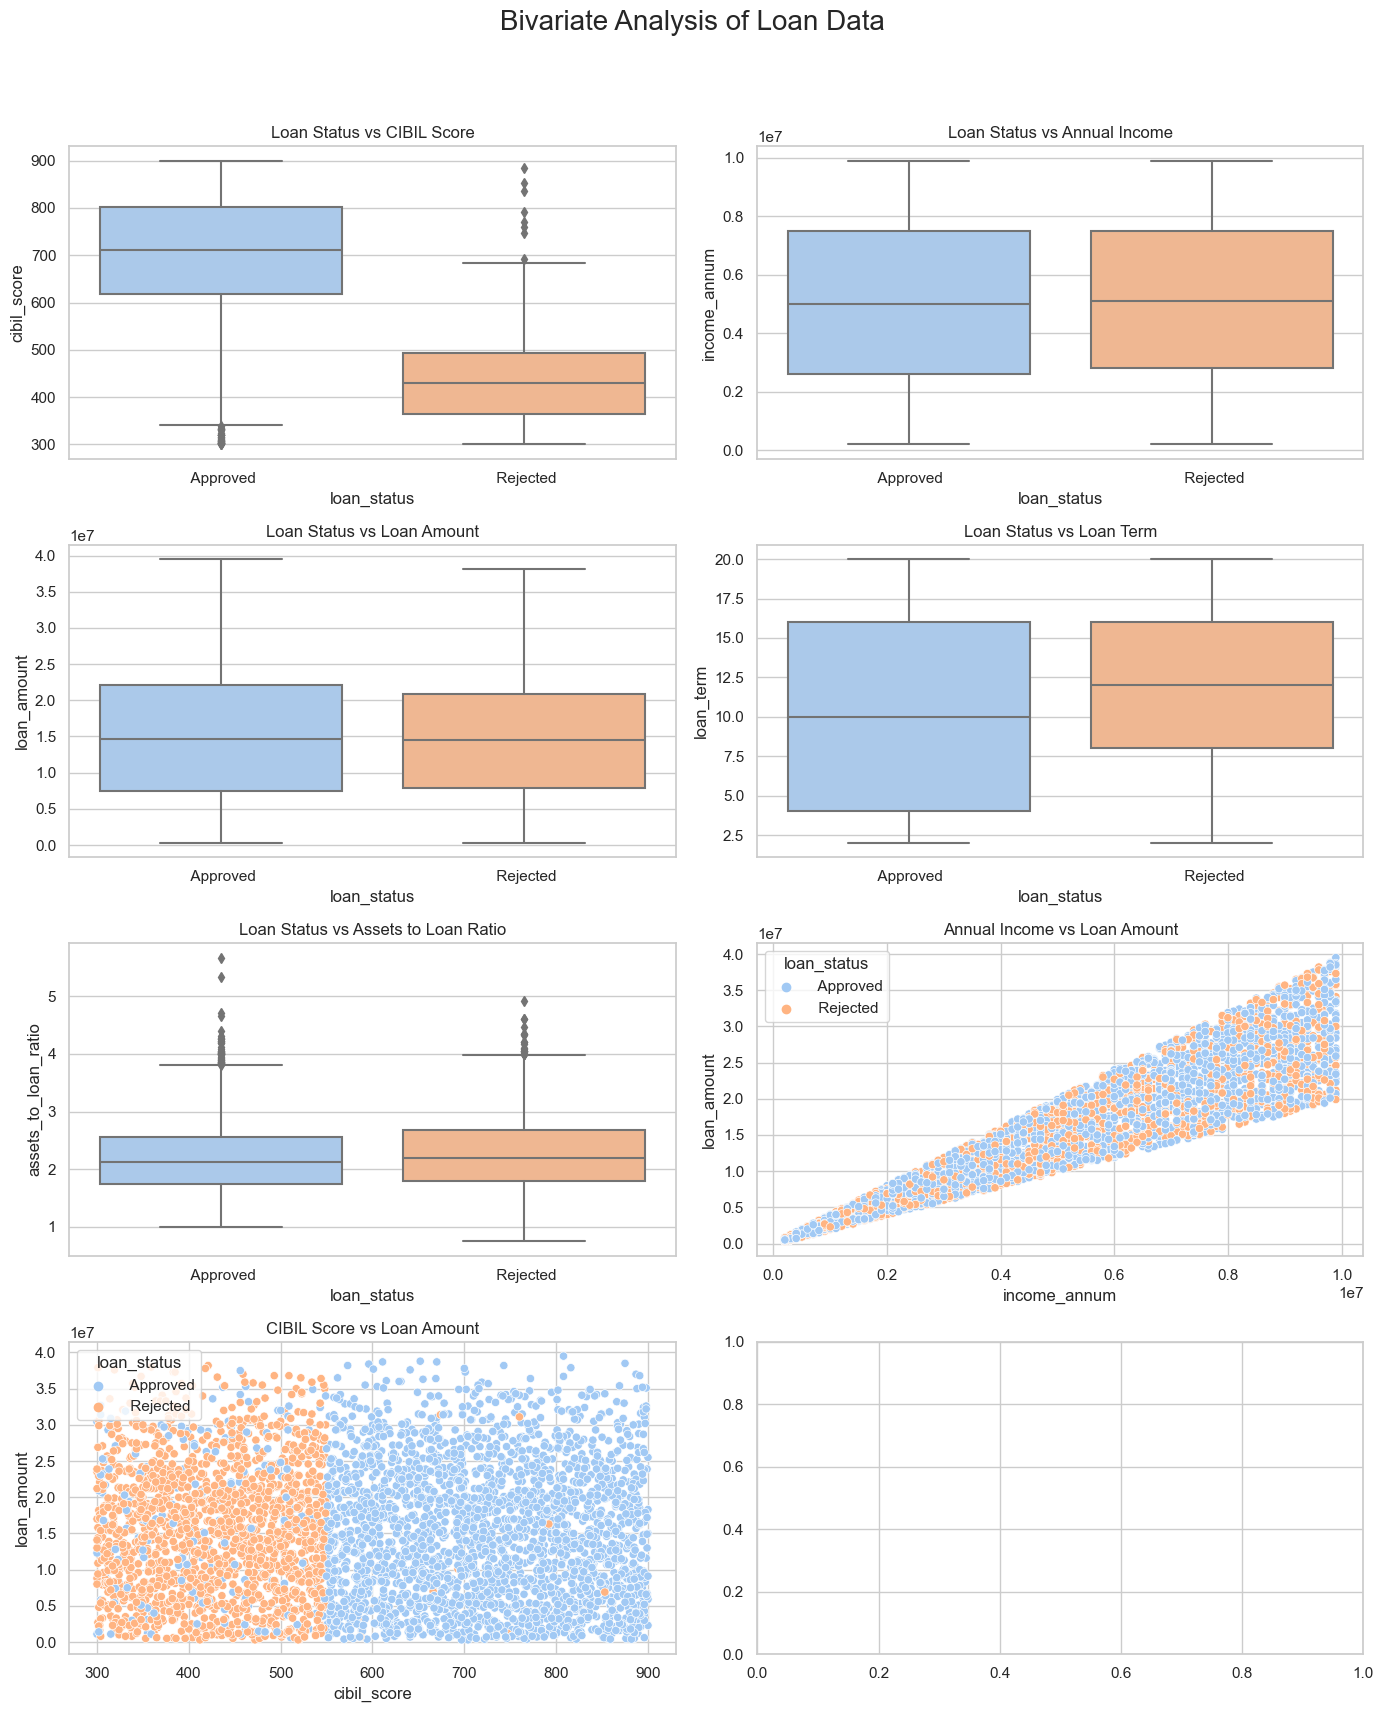

In [8]:

fig, axes = plt.subplots(4, 2, figsize=(14, 18))  
fig.suptitle('Bivariate Analysis of Loan Data', fontsize=20)

sns.boxplot(ax=axes[0, 0], x='loan_status', y='cibil_score', data=loan_data)
axes[0, 0].set_title('Loan Status vs CIBIL Score')

sns.boxplot(ax=axes[0, 1], x='loan_status', y='income_annum', data=loan_data)
axes[0, 1].set_title('Loan Status vs Annual Income')

sns.boxplot(ax=axes[1, 0], x='loan_status', y='loan_amount', data=loan_data)
axes[1, 0].set_title('Loan Status vs Loan Amount')


sns.boxplot(ax=axes[1, 1], x='loan_status', y='loan_term', data=loan_data)
axes[1, 1].set_title('Loan Status vs Loan Term')


sns.boxplot(ax=axes[2, 0], x='loan_status', y='assets_to_loan_ratio', data=loan_data)
axes[2, 0].set_title('Loan Status vs Assets to Loan Ratio')


sns.scatterplot(ax=axes[2, 1], x='income_annum', y='loan_amount', hue='loan_status', data=loan_data)
axes[2, 1].set_title('Annual Income vs Loan Amount')

sns.scatterplot(ax=axes[3, 0], x='cibil_score', y='loan_amount', hue='loan_status', data=loan_data)
axes[3, 0].set_title('CIBIL Score vs Loan Amount')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Results:

>1. **Loan Status vs CIBIL Score**: The box plot shows a **higher median CIBIL score** for **approved** loans compared to rejected ones, indicating that a higher credit score **significantly influences** loan approval decisions. There's less variance in scores for approved loans, suggesting a tighter credit score threshold for approval.

>2. **Loan Status vs Annual Income**: Approved loans tend to have a slightly higher median annual income than rejected loans, but the spread and outliers indicate substantial overlap. This suggests that while income plays a role in loan approval, it is **not as decisive as the CIBIL score**.

>3. **Loan Status vs Loan Amount**: The median loan amount for approved loans is higher than for rejected loans. Also, the range (interquartile) of loan amounts for approved loans is wider, suggesting a more varied loan amount distribution among approved applicants.

>4. **Loan Status vs Loan Term**: Loan term distributions show **considerable overlap** between approved and rejected loans, indicating that loan term alone **may not be a significant discriminator** in loan approval decisions.

>5. **Loan Status vs Assets to Loan Ratio**: The higher median and wider spread for approved loans suggest that having a **higher assets-to-loan ratio can favor loan approval**. This indicates that collateral relative to loan amount may be considered when assessing loan applications.

>6. **Annual Income vs Loan Amount**: There is a **positive trend** between annual income and loan amount, with higher incomes associated with larger loan amounts. The color differentiation shows that **higher income and loan amounts do not guarantee approval**, as there are **both approved and rejected cases throughout the range**.

>7. **CIBIL Score vs Loan Amount**: The scatter plot indicates that a higher CIBIL score does necessarily correlate with a higher loan amount. There are approved loans across a wide range of CIBIL scores and loan amounts, but a **cluster of rejections is evident in the lower CIBIL score range**.


# Multi-variate Analysis

To examine relationships and patterns between two or more variables simultaneously to understand complex interactions and dependencies

## Label Encoding
>It assigns a unique numerical label to each category in a 
categorical variable. It preserves the ordinal relationship between the 
categories. 
`education`, `self_employed` and `loan_status` can use label encoding as they are
essentially encoded to be 0 or 1 which is just binary encoding.

>`cibil_category` have a clear order (Poor < Fair < Good < Very Good < Excellent) 
and are thus suitable for label encoding.

> We will convert the categorical variables into numeric format using label encoding or one-hot encoding as appropriate. This step will make the data ready for correlation analysis and model fitting.

In [9]:
label_encoder = LabelEncoder()


loan_data['education'] = label_encoder.fit_transform(loan_data['education'].str.strip())
loan_data['self_employed'] = label_encoder.fit_transform(loan_data['self_employed'].str.strip())
loan_data['loan_status'] = label_encoder.fit_transform(loan_data['loan_status'].str.strip())
loan_data['cibil_category'] = label_encoder.fit_transform(loan_data['cibil_category'].str.strip())


loan_data['no_of_dependents'] = loan_data['no_of_dependents'].astype(int)
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 0 if x == 1 else 1)
cibil_category_mapping = {0: 4, 1: 3, 2: 2, 3: 1}
loan_data['cibil_category'] = loan_data['cibil_category'].map(cibil_category_mapping)
loan_data['cibil_category'].value_counts().sort_index()



loan_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,movable_assets,immovable_assets,loan_to_income_ratio,assets_to_loan_ratio,cibil_category
0,2,0,0,9600000,29900000,12,778,1,30700000,20000000,3.114583,1.695652,4
1,0,1,1,4100000,12200000,8,417,0,12100000,4900000,2.975610,1.393443,1
2,3,0,0,9100000,29700000,20,506,0,46100000,11600000,3.263736,1.942761,1
3,3,0,0,8200000,30700000,8,467,0,31200000,21500000,3.743902,1.716612,1
4,5,1,1,9800000,24200000,20,382,0,34400000,20600000,2.469388,2.272727,1




## Correlation Analysis
> We'll examine the correlations among numerical variables and their relationship with the target variable `loan_status` to identify potential predictors.

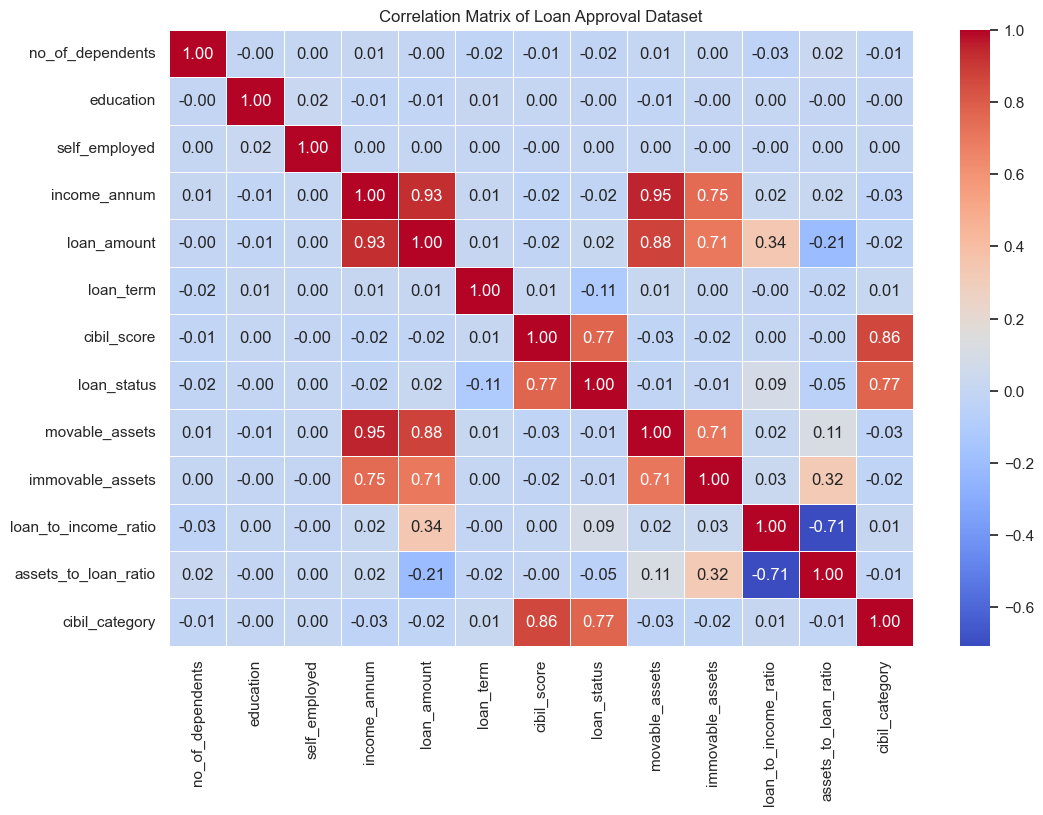

In [10]:
correlation_matrix = loan_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Loan Approval Dataset')
plt.show()


# Observations: 

>1. **Strong Positive Correlation**:
>- There is a **strong positive correlation** between `cibil_score` and `loan_status`. This likely indicates that a higher CIBIL score, which suggests better creditworthiness, is associated with a higher likelihood of loan approval. This is a critical insight for lenders, as it validates the use of CIBIL scores as a reliable metric in the loan approval process.

>2. **Income and Loan Amount**:
  > - The **correlation** between `income_annum` and `loan_amount` is also **notably strong**. This correlation suggests that borrowers with higher annual incomes tend to secure larger loan amounts, which aligns with financial intuition that those with greater income can afford larger loans.

>3. **Loan Amount and Loan Term**:
  > - A **moderate correlation** exists between `loan_amount` and `loan_term`, indicating that larger loans tend to have longer repayment periods. This could be due to the necessity of spreading out repayment over a longer period to make the monthly payments more manageable for larger loan amounts.

>4. **Assets and Loan Metrics**:
   >- Both `movable_assets` and `immovable_assets` show **relatively low correlations** with other financial variables like `loan_amount` or `cibil_score`. This suggests that while assets are important, they may not directly influence loan amount or approval processes as much as income and credit scores.

>5. **Other Observations**:
   >- There are **weak correlations** among other variables such as `no_of_dependents` with financial variables like `loan_amount` or `income_annum`, indicating these factors might be less influential in the context of this dataset for loan processing decisions.

This matrix provides significant insights into which factors are **most influential** in loan approval decisions and can help in refining risk assessment models. For instance, the strong link between `cibil_score` and `loan_status` underscores the importance of credit scores in lending decisions, reinforcing the need for potential borrowers to maintain or improve their credit scores. Moreover, the link between `income_annum` and `loan_amount` highlights income verification as a crucial part of loan assessments.

# Principal Component Analysis (PCA)

"A dimensionality reduction and machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends." 

#### Correlation Analysis:
> **notably strong correlations** between some features.
> - income_annum and loan_amount (0.93)
> - income_annum and movable_assets (0.95)

> Other **notable correlations** include relationships between
> - loan_amount and movable_assets 
> - immovable_assets and assets_to_loan_ratio.

##### Given strong correlations between several pairs of features, PCA would help in reducing the dimensionality of the data, which can:
> - Alleviate issues of multicollinearity, which can impair the performance of some machine learning models.
> - Potentially enhance the model's performance by focusing on the most informative components.

# Standardisation of data and splitting (80:20)


[0.29045882 0.15498998 0.15254904 0.08583312 0.08396055 0.08233291
 0.08111922 0.03949076] [0.29045882 0.44544879 0.59799783 0.68383095 0.7677915  0.8501244
 0.93124363 0.97073439]


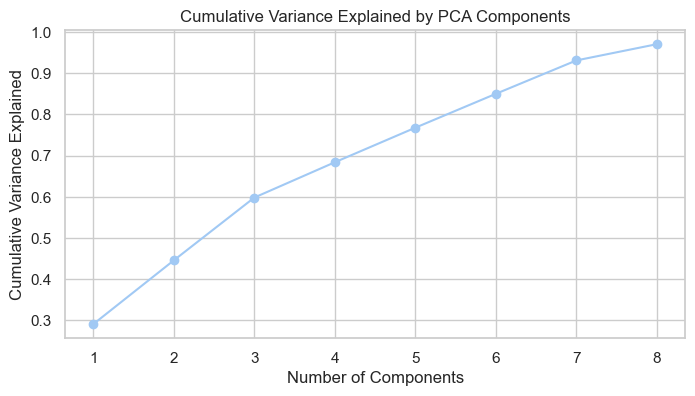

In [11]:
scaler = StandardScaler()
for col in categorical_columns:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])

# Split the data into features and target
X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% of the data used as the test set
    random_state=69  # Seed for reproducibility
)

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=8)  # Choosing 8 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Get and display the explained variance from PCA
explained_variance = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

print(explained_variance, cumulative_variance)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()


### Explained Variance by Each Principal Component:
- **First Principal Component**: **29.05%** of the total variance
- **Second Principal Component**: **15.50%** of the total variance
- **Third Principal Component**: **15.25%** of the total variance
- Subsequent components progressively explain less variance.

### Cumulative Variance Explained:
- The **first three components** explain approximately **59.80%** of the total variance.
- By the time **eight components** are included, approximately **97.07%** of the variance is captured.

### Interpretation:
- The first three principal components account for over half of the total variance in the dataset, indicating that they capture significant information about the dataset's structure.
- While the first two components don't capture the majority of the variance (typically, it's desirable to see >70% variance explained in the first few components to rely primarily on them), they still provide a substantial reduction in dimensionality with a reasonable retention of information.
  


### We would now proceed to our model building of Logistic Regression and RandomForest to predict `loan_status`.

In [12]:
X_train_pca = pd.DataFrame(X_train_pca, columns=[f'PCA_{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca = pd.DataFrame(X_test_pca, columns=[f'PCA_{i+1}' for i in range(X_test_pca.shape[1])])


In [13]:
X_train_pca.to_csv('X_train_pca.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test_pca.to_csv('X_test_pca.csv', index=False)
y_test.to_csv('y_test.csv', index=False)